In [770]:
#https://www.wolframalpha.com/input?i2d=true&i=%7B%7B1%2C4%2C8%2C5%7D%2C%7B0.25%2C1%2C7%2C8%7D%2C%7B0.125%2C0.14285714%2C1%2C8%7D%2C%7B0.2%2C0.125%2C0.125%2C1%7D%7D
import numpy as np
import random
np.random.seed(42)
random.seed(42)
dims = 5

#M = np.random.randint(9, size=(dims, dims))+1
#print(M)

possible_vals = [1/9, 1/8, 1/7, 1/6, 1/5, 1/4, 1/3, 1/2, 1, 2 ,3 ,4 ,5 ,6 ,7 , 8, 9]


def reciprocal(dims):

    #M = Matrix.astype(float)
    M = np.zeros((dims, dims))

    for i in range(M.shape[0]):

        
        for j in range(M.shape[1]):
            M[i,j] = random.choice(possible_vals)
            M[j,i] =M[i,j]
            M[j,i] = float(1/M[i,j])
        M[i,i] = 1

    return M

print(reciprocal(dims))


def calc_CI(max_eig_val, dim):
    return (max_eig_val-dim)/(dim-1)

# Test random matrix
calc_CI(6.37, 5)

[[1.         0.14285714 8.         0.16666667 8.        ]
 [7.         1.         9.         0.125      4.        ]
 [0.125      0.11111111 1.         0.125      0.2       ]
 [6.         8.         8.         1.         9.        ]
 [0.125      0.25       5.         0.11111111 1.        ]]


0.3425

In [771]:
#Perform eigendecomposition on covariance matrix
# Source: https://www.districtdatalabs.com/principal-component-analysis-with-python

RM = reciprocal(dims)

eig_vals, eig_vecs = np.linalg.eig(RM)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])


max_eig_val = max(eig_vals)
max_eig_val

Eigenvectors 
[[-0.52800946+0.j          0.26206964-0.45831718j  0.26206964+0.45831718j
   0.57029479+0.06807783j  0.57029479-0.06807783j]
 [-0.05976363+0.j          0.00371664-0.01073733j  0.00371664+0.01073733j
  -0.61761713+0.j         -0.61761713-0.j        ]
 [-0.43566189+0.j          0.21832441+0.37874077j  0.21832441-0.37874077j
   0.3301603 +0.09358619j  0.3301603 -0.09358619j]
 [-0.72576962+0.j         -0.72800644+0.j         -0.72800644-0.j
   0.37194693+0.16112685j  0.37194693-0.16112685j]
 [-0.03303777+0.j          0.00086638+0.0056148j   0.00086638-0.0056148j
   0.01233095-0.08034743j  0.01233095+0.08034743j]]

Eigenvalues 
[ 8.75747222+0.j         -2.3690941 +5.6146505j  -2.3690941 -5.6146505j
  0.49035798+0.41882868j  0.49035798-0.41882868j]
Eigenvalues in descending order:
8.757472222735244
6.094005827482125
6.094005827482125
0.6448786024522974
0.6448786024522974


(8.757472222735244+0j)

In [775]:
N = 2000
max_dim = 15

stored_CIs = np.zeros((N,max_dim))
print(stored_CIs.shape)


for i in range(N):
    for dim in range(2,max_dim):


        M = reciprocal(dim)

        #Perform eigendecomposition on matrix
        eig_vals, eig_vecs = np.linalg.eig(M)
        #print(eig_vals)
        max_eig_val = max(eig_vals)

        CI = calc_CI(max_eig_val, dim)

        stored_CIs[i, dim] = CI



print(stored_CIs[0])




(2000, 15)


C:\Users\pkastner\AppData\Local\Temp/ipykernel_7752/1675232542.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  stored_CIs[i, dim] = CI


[0.         0.         0.         2.12330807 0.47341425 1.17931824
 0.8100789  1.2350707  1.67949148 1.17198549 1.83484973 1.43846319
 1.48271177 1.48899862 1.71557214]


In [776]:
# Compute averages

givenRI = [0, 0, 0.52, 0.89, 1.11 ,1.25,1.35,1.40,1.45,1.49,1.52,1.54,1.56,1.58,1.59]

CI_avg = np.mean(stored_CIs, axis=0)
print("Avg CI", CI_avg)
CI_avg= np.nan_to_num(CI_avg) 
print("Avg CI", CI_avg)

RI_avg = np.nan_to_num(givenRI) 
print("Avg RI", RI_avg)

Avg CI [0.         0.         0.         0.51692839 0.89198776 1.10096525
 1.24392174 1.33786855 1.40960853 1.45324424 1.48563238 1.51655266
 1.53925039 1.55322705 1.5710094 ]
Avg CI [0.         0.         0.         0.51692839 0.89198776 1.10096525
 1.24392174 1.33786855 1.40960853 1.45324424 1.48563238 1.51655266
 1.53925039 1.55322705 1.5710094 ]
Avg RI [0.   0.   0.52 0.89 1.11 1.25 1.35 1.4  1.45 1.49 1.52 1.54 1.56 1.58
 1.59]


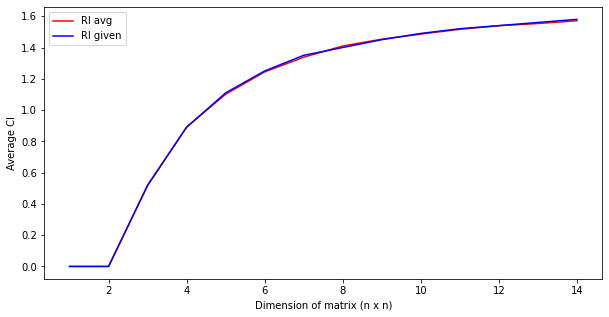

In [777]:
import matplotlib.pyplot as plt
#Plot given RIs against generated ones

fix, ax = plt.subplots(figsize =(10,5))

X = np.linspace(1,14, 14)

plt.plot(X,CI_avg[1:], color = 'red', label = 'RI avg')
plt.plot(X,givenRI[:-1], color = 'blue', label = 'RI given')
ax.set_xlabel("Dimension of matrix (n x n)")
ax.set_ylabel("Average CI")
ax.legend()


In [129]:
# Cost function

import numpy as np
import random
import math

MM = np.matrix('[1.     1         0   1        1       ;0 1.         1        0 0;  1         0 1.         1         0     ;  0 1        0 1.         1.        ;  0 1         1         0      1       ')

print(MM)


def cost_function(M):
    for i in range(M.shape[0]):        
        for j in range(M.shape[1]):
            if M[i,j] !=0:
                M[j,i] = dist(j,i, i, j)
            else:
                M[j,i] =0
        M[i,i] = 0

    return M.sum().sum()
    
def dist(x1,x2,y1,y2):
    return math.hypot(x2 - x1, y2 - y1)

MMM = cost_function(MM)

MMM
#MMM + MM

[[1. 1. 0. 1. 1.]
 [0. 1. 1. 0. 0.]
 [1. 0. 1. 1. 0.]
 [0. 1. 0. 1. 1.]
 [0. 1. 1. 0. 1.]]


31.112698372208094